# Number Line Model #

The Number Line Model (henceforth NLM) is the most widely adopted explanation of human and animal performance in numerical discrimination and comparison tasks. 

It assumes that the observed weber ratio is directly correlated with an internal weber ratio that correspond to the standard deviation of the gaussian representing a number. 
For example for an internal weber ratio of 0.2 the number 6 is represented as a gaussian with mean $\mu = 6$ and standard deviation $\sigma =6 *0.2= 1.2$. 

Clearly larger numbers get represented by larger gaussians, consequently the overlapping of any two consecutive gaussians is greater for larger numbers than for smaller numbers. 


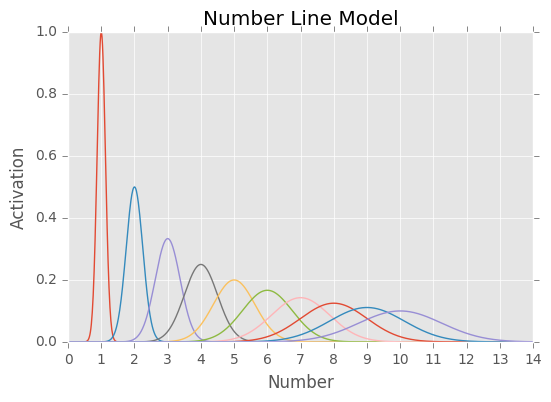

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
from matplotlib import style
#style.use('fivethirtyeight')
style.use('ggplot')

mu = 1
variance = 1
weber = .125
sigma = math.sqrt(variance)
x = np.linspace(0, 14, 1000)
maximum_activation = mlab.normpdf(1, 1, 1*.125) # normpdf(x, mu sigma), press Shift+tab 

# uncomment the following line for unnormalized plot 
# maximum_activation = 1

# Computed according to 
# 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2) #mlab.py 

for mu in range(1,11):
    sigma = mu * weber
    #normalized plot, maximum activation one 
    #sigma = math.sqrt(variance)
    plt.plot(x,mlab.normpdf(x, mu, sigma)/maximum_activation)

plt.xlabel('Number')
plt.ylabel('Activation')
plt.title('Number Line Model')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.savefig('NLM.png')
plt.show()

Notice that the height of the Gaussian is governed by $\sigma$. Therefore larger numerosity have smaller activation values (usually assumed to be spiking rate or average voltage). 
It's not usually recognized but this simple phenomena can give us an upper bound on the representational power of this model. maximum firing rate correspond to the hight of the gaussian (namely $pdf(x)=1./(sqrt(2*pi)*sigma)*exp(-0.5 * (1./sigma*(x - mu))**2))$ that is a numerosity of $20$ ha a firing rate of $1/20$. This phenomena is not observed in real neuronal data. Cfr. Nieder 2002. 

## NLM on log scale ##

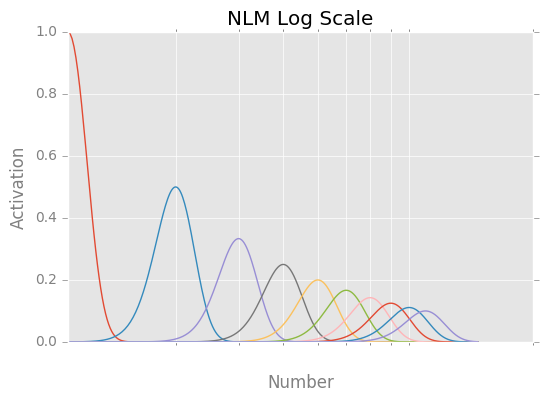

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
from matplotlib import style
from matplotlib.ticker import ScalarFormatter
#style.use('fivethirtyeight')
style.use('ggplot')

mu = 1
variance = 1
weber = .125
sigma = math.sqrt(variance)
x = np.linspace(1, 14, 1000)
maximum_activation = mlab.normpdf(1, 1, 1*.125)

fig = plt.figure()
ax = fig.add_subplot(111)
for mu in range(1,11):
    sigma = mu * weber
    #normalized plot, maximum activation one 
    #sigma = math.sqrt(variance)
    ax.plot(x,mlab.normpdf(x, mu, sigma)/maximum_activation)

plt.xlabel('Number')
plt.ylabel('Activation')
plt.title('NLM Log Scale')
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.xticks([1,2,3,4,5,6,7,8,9,20])
plt.xlim([1,20])
ax.xaxis.label.set_color('gray')
ax.yaxis.label.set_color('gray')
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
plt.savefig('NLMlog.png', transparent=True)
plt.show()

Wheter the number line is compressive or linear is an empirical issue. 
Mathematically the two models are clearly the same. 
If plotted on a log scale, the gaussians have a fixed standard deviation, as is more apparent from the normalized log response below 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
from matplotlib import style
from matplotlib.ticker import ScalarFormatter
#style.use('fivethirtyeight')
style.use('ggplot')

mu = 1
variance = 1
weber = .125
sigma = math.sqrt(variance)
x = np.linspace(1, 14, 1000)

fig = plt.figure()
for mu in range(1,11):
    maximum_activation = mlab.normpdf(1, 1, mu*.125)
    sigma = mu * weber
    #normalized plot, maximum activation one 
    #sigma = math.sqrt(variance)
    plt.plot(x,mlab.normpdf(x, mu, sigma)/maximum_activation)

plt.xlabel('Number')
plt.ylabel('Activation')
plt.title('NLM - Normalized Log')
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.xticks([1,2,3,4,5,6,7,8,9,20])
plt.xlim([1,20])
plt.savefig('NLMnormlog.png')
plt.show()

In [ ]:
from scipy import integrate
g = mlab.normpdf(x, 1, sigma)/maximum_activation
f = mlab.normpdf(x, 2, sigma)/maximum_activation

integrate.quad(lambda x: abs(mlab.normpdf(x, 1, sigma)/maximum_activation - mlab.normpdf(x, 2, sigma)/maximum_activation), 1, 14)


## Compare two ordinal numbers ##

The easiest way to use the model to compare any two given numerosity is via gaussian subtraction, where e.g. for numerosity $5,6$, $mu = 6-5$ and $sigma = \sqrt{\sigma^2_5 + \sigma^2_6}$

This corresponds to the degree of overlapping regions of two normal distributions. 

The more overlap there is between the two Gaussian's representations being compared, the less accurately they can be discriminated.

In [ ]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
from matplotlib import style
#style.use('fivethirtyeight')
style.use('ggplot')

mu = 1
variance = 1
weber = .125
sigma = math.sqrt(variance)
x = np.linspace(0, 14, 1000)
maximum_activation = mlab.normpdf(1, 1, 1*.125)

for mu in range(5,7):
    sigma = mu * weber
    #normalized plot, maximum activation one 
    #sigma = math.sqrt(variance)
    plt.plot(x,mlab.normpdf(x, mu, sigma)/maximum_activation)

plt.xlabel('Number')
plt.ylabel('Activation')
plt.title('Number Line Model')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

In [ ]:
from math import sqrt
sigma_5 = 5 * weber
sigma_6 = 6 * weber
new_mu = 6-5
difference_sigma = sqrt(sigma_5**2+sigma_6**2) 

x = np.linspace(-3, 3, 1000)
plt.plot(x,mlab.normpdf(x, new_mu, difference_sigma)/maximum_activation, color='#096c99')
plt.axvline(x=0, ls = '-.', color='#99a2a1')
plt.show()

The difference of two gaussians is again a gaussian.  In a discrimination/comparison task the area under the curve on the right of zero can be seen as evidence in favor of 6 whilst the area undelying th curve on the left of zero can be seen as evidence in favor of 5. 

# Simulated Experiment #

In [ ]:
test =  np.random.normal(new_mu, difference_sigma, 1000)

In [ ]:
len(test[test<0])

In [ ]:
class D(dict):
    def __missing__(self, key):
        self[key] = D()
        return self[key]
experiment = D()  

for distance in range(1,7):
    for i in range(1, 10-1): 
        sigma_a = i * weber
        sigma_b = i+distance * weber
        if i+distance>10:
            break
        new_mu =  distance
        difference_sigma = sqrt(sigma_a**2+sigma_b**2) 
        test =  np.random.normal(new_mu, difference_sigma, 1000)
        experiment['distance'+str(distance)][str(i)+'-'+str(i+distance)] = len(test[test<0])


In [ ]:
experiment

In [ ]:
from math import sqrt
sigma_5 = 7 * weber
sigma_8 = 10 * weber
new_mu = 10-7
difference_sigma = sqrt(sigma_5**2+sigma_8**2) 

x = np.linspace(-3, 3, 1000)
plt.plot(x,mlab.normpdf(x, new_mu, difference_sigma)/maximum_activation, color='#096c99')
plt.show()

### Plot distance - error ###

In [ ]:
# http://stackoverflow.com/questions/1867861/python-dictionary-how-to-keep-keys-values-in-same-order-as-declared
experiment_keys = ['distance1', 'distance2', 'distance3', 'distance4', 'distance5', 'distance6']
results = []
for key in experiment_keys:
    sum = 0
    for keys in experiment[key]: 
        sum += experiment[key][keys]
    average = sum/len(experiment[key])/10 #i.e. /1000*100
    results.append(average)

In [ ]:
results

In [ ]:
x = np.arange(0, 6)
plt.plot(x,np.array(results),color='#096c99')

plt.xlabel('Distance')
plt.ylabel('Error-Rate in %')
plt.title('Distance Effect')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.savefig('distanceEffect.png')
plt.show()

### Plot Magnitude/Size error ###

In [ ]:
keys_1 = ['1-2','2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9']
result_magnitude_1 = [experiment['distance1'][keys]/1000 for keys in keys_1]

In [ ]:
result_magnitude_1

In [ ]:
x = np.arange(1, 9)
plt.plot(x,np.array(result_magnitude_1),color='#096c99')

plt.xlabel('Magnitude')
plt.ylabel('Error-Rate in %')
plt.title('Magnitude Effect')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.savefig('magnitudeEffect.png')
plt.show()

### Just Noticiable Difference (JND) ###

In [ ]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
from matplotlib import style
#style.use('fivethirtyeight')
style.use('ggplot')

mu = 1
variance = 1
weber = .125
sigma = math.sqrt(variance)
x = np.linspace(5, 30, 1000)
maximum_activation = mlab.normpdf(1, 1, 1*.125)

for mu in range(16,19):
    sigma = mu * weber
    #normalized plot, maximum activation one 
    #sigma = math.sqrt(variance)
    plt.plot(x,mlab.normpdf(x, mu, sigma)/maximum_activation)

plt.xlabel('Number')
plt.ylabel('Activation')
plt.title('Number Line Model')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

In [ ]:
sigma_a = 16 * weber
sigma_b = 17 * weber
difference_sigma = sqrt(sigma_a**2+sigma_b**2) 
test =  np.random.normal(1, difference_sigma, 1000)
100-len(test[test<0])/10 #/1000*100


Therefore the model doesn't **consistently discriminate** $16$ from $17$. 

$16 \cdot.125 = 2$ 

therefore we expect that the model **consistently discriminates** $16$ from $18$

In [ ]:
sigma_a = 16 * weber
sigma_b = 18 * weber
difference_sigma = sqrt(sigma_a**2+sigma_b**2) 
test =  np.random.normal(2, difference_sigma, 1000)
100-len(test[test<0])/10 #/1000*100

We usually decide to call a specific level of performance the ‘threshold’. A good level (for 2AFC) is 75% correct, as it is half way between chance and perfect performance – it’s when the observer can just see the target.

18/16 = 1.125 --> 18 = 16 * 1.125 = 16 * (1+0.125) = 16*1 + 16*.125

Perfection is asyntotical, but note 4/2 = 2 >> .125  and the error rate is always almost 0 

In [ ]:
sigma_a = 2 * weber
sigma_b = 4 * weber
difference_sigma = sqrt(sigma_a**2+sigma_b**2) 
test =  np.random.normal(2, difference_sigma, 1000)
100-len(test[test<0])/10 #/1000*100

In [ ]:
test_ratio = [(5,5), (6,5), (7,5), (5,3), (7,4), (8,4)]
results = []
for i in test_ratio:
    sigma_a = i[0] * weber
    sigma_b = i[1] * weber
    difference_sigma = sqrt(sigma_a**2+sigma_b**2)
    test = np.random.normal(abs(i[0]-i[1]), difference_sigma, 1000)
    results.append(100-len(test[test<0])/10)
    
    

In [ ]:
results

In [ ]:
x = [5.0/5.0, 6.0/5.0, 7.0/5.0, 5.0/3.0, 7.0/4.0, 8.0/4.0]
plt.plot(x, results)
plt.show()

xvals = np.linspace(1, 2, 1000)
yinterp = np.interp(xvals, x, results)
line2d = plt.plot(xvals, yinterp)
#plt.axvline(x=1.125)
#plt.axhline(y=75)
plt.plot((0.8, 1.148), (75, 75), 'k--')
plt.plot((1.148, 1.148), (50, 75), 'k--')
plt.show()
np.interp(75, results, x)

# http://stackoverflow.com/questions/9850845/how-to-extract-points-from-a-graph
# plot() returns a useful object: [<matplotlib.lines.Line2D object at 0x38c9910>]
xvalues = line2d[0].get_xdata()
yvalues = line2d[0].get_ydata()
idy = np.min(np.where(np.logical_and(yvalues<=76,yvalues>=75)))
# xy = line2d[0].get_xydata()
# xy[2]
print(np.interp(75, results, x))
xvalues[idy]


Note it's not a step function with poor performance below thresold, and good performance above it. Rather is a smooth monotonically increasing functiion. 

To be added: value at 75%, this correspond to the weber ratio, WR = 1.125, w=1-1.125=0.125